# 1. Classification

Machine learning is the process whereby:
* **Computers are given the ability to learn to make decisions from data.**

**_Unsupervised learning:_** 
> Uncovering hidden patterns from unlabeled data.

**_Supervised learning:_**

> Predicted values are known.

> **Goal:** Predict the target values of unseen data, given the features.

**_Types of supervised learning:_**

* **Classification:** (Binary Classification) Target variable consists of categories.

* **Regression:** Target variable is contonuous.


**Terminology.**

* **Feature = Predictor variable = Independent variable**

* **Target variable = Response variable = Dependent variable** 

**Requirements for supervised learning**

> **No missing values.**

> **Data in numeric format.**

> **Data stored in pandas DF or Numpy array.**

**Perform an EDA first.**

In [1]:
import warnings
warnings.filterwarnings('ignore')
#from sklearn.module import Model

# model = Model()
# model.fit(X, y)

# predictions = model.predict(X_new)
# print(predictions)

### Binary classification


In [2]:
import pandas as pd
churn_df = pd.read_csv('telecom_churn_clean.csv', index_col=0)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


> Examine the data and choose which column could be the target variable for binary classification.

> `"churn"` has values of 0 or 1, so it can be predicted using a binary classification model.

## The classification challenge

**Classifying data of unseen data**

1. Build a model.

2. Model learns from the labeled data we pass to it.

3. Pass unlabeled data to the model as input.

4. Model predicts the labels of the unseen data.

**Labeled data = Training data**

In [3]:
from sklearn.neighbors import KNeighborsClassifier

X = churn_df[["total_day_charge", "total_eve_charge"]].values

y = churn_df['churn'].values

print(X, y)

[[45.07 16.78]
 [27.47 16.62]
 [41.38 10.3 ]
 ...
 [30.74 24.55]
 [36.35 13.57]
 [39.85 22.6 ]] [0 0 0 ... 0 0 0]


In [4]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [5]:
import numpy as np

X_new = np.array([[56.8, 17.5],
                 [24.4, 24.1],
                 [50.1, 10.9]])
print(X_new.shape)

(3, 2)


In [6]:
predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions))

Predictions: [1 0 0]


### k-Nearest Neighbors: Fit


In [7]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict


In [8]:
X_0 = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [9]:
# Predict the labels for the X_new
y_0 = knn.predict(X_0)

# Print the predictions for X_new
print("Predictions: {}".format(y_0)) 

Predictions: [0 1 0]


> The model has predicted the first and third customers will not churn in the new array. But how do we know how accurate these predictions are? 

## Measuring model performance

> In classification, accuracy is a common metric.


In [10]:
from sklearn.model_selection import train_test_split

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.852

### Train/test split + computing accuracy


In [11]:
# Import the module
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_tr, y_tr)

KNeighborsClassifier()

### Overfitting and underfitting


In [12]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.8516930990141449, 2: 0.8761251607372482, 3: 0.876553793399057, 4: 0.8684097728246892, 5: 0.8696956708101158, 6: 0.864123446206601, 7: 0.8671238748392628, 8: 0.8576939562794685, 9: 0.858979854264895, 10: 0.8572653236176596, 11: 0.8585512216030862, 12: 0.856408058294042} 
 {1: 0.78, 2: 0.849, 3: 0.839, 4: 0.853, 5: 0.844, 6: 0.852, 7: 0.851, 8: 0.85, 9: 0.851, 10: 0.855, 11: 0.854, 12: 0.855}


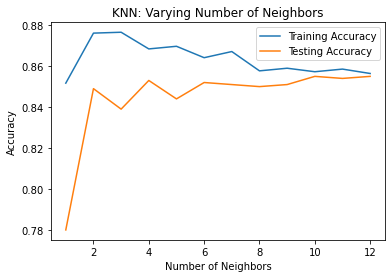

In [13]:
import matplotlib.pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# 2. Regression

## Introduction to regression





In [14]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Creating feature and target arrays

In [15]:
X = diabetes_df.drop("glucose", axis=1).values
# y = Target column
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#####  Making predictions from a single feature

In [16]:
X_bmi = X[:,4]
y.shape, X_bmi.shape

((768,), (768,))

> Our features must be formated as a 2D array.

In [17]:
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

(768, 1)

##### Plotting glucose vs bmi

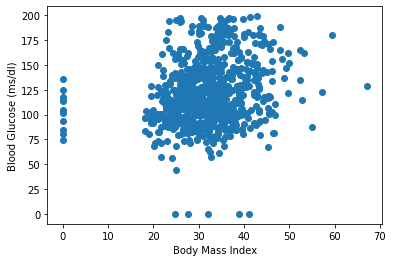

In [18]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (ms/dl)")
plt.xlabel("Body Mass Index")
plt.show()

##### Fitting a regression model


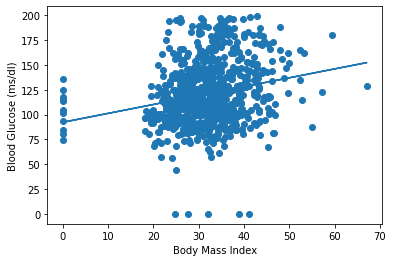

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
# Plot
plt.scatter(X_bmi,y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (ms/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Creating features


In [20]:
sales_df = pd.read_csv('advertising_and_sales_clean.csv')
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [21]:
import numpy as np

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model


In [22]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


> See how sales values for the first five predictions range from $95,000 to over $290,000. Let's visualize the model's fit.

### Visualizing a linear regression model


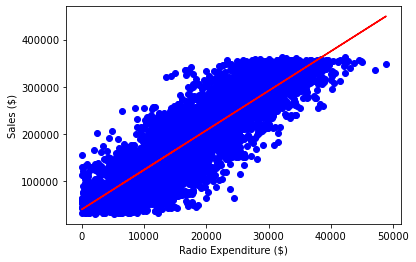

In [23]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

> The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales!

## The basics of linear regression

**Regression mechanics**

$y = ax + b$

> Simple linear regression uses one feature.

    y: Target.
    
    x: Single feature
    
    a,b = parameters/coefficients of the model - slope, intercept.

**How do we choose a and b?**

**Error Function = Loss Function = Cost Function**
* Define an error function for any given line.

* Choose the line that minimizes the error function.


**Ordinary Least Squares (OLS): Minimize RSS**

Calculate the RSS (Residual Sum of Squares)


**Linear Regression in Higher Dimensions**


$y = a_{1}x_{1} + a_{2}x_{2} + b$

* Need to specify 3 variables: $a_{1}, a_{2}, b$

### Linear regression using all features

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = diabetes_df.drop("glucose", axis=1).values
# y = Target column
y = diabetes_df["glucose"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

##### R-Squared

**$R^2$: Quantifies the variance in target values explained by features.**

* Values from 0 to 1.


In [25]:
reg_all.score(X_test, y_test)

0.28280468810375115

> **The features only explain about 28% of bloodglucose level variance.**

**Mean Squared Error(MSE): It is measured in target units, squared**

**Root Mean Squared Error(RMSE): Measured in the target units, root squared.**


In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

26.341459582232265

> **The model has an average error for blood glucose levels of around 26.3 milligrams per deciliter.**
### Fit and predict for regression


In [27]:
sales_num = sales_df[['tv','radio','social_media','sales']]

In [28]:
# Create X and y arrays
X = sales_num.drop("sales", axis=1).values
y = sales_num["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


> The first two predictions appear to be within around 5% of the actual values from the test set!

### Regression performance


In [29]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001


> The features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!

## Cross-validation

* Model performance is dependent on the way we split up the data.

* Not representative of the model's ability to generaize to unseen data.

**Solution: Cross-Validation**


In [30]:
from sklearn.model_selection import cross_val_score, KFold
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


In [31]:
# Mean and Standard deviation
print(np.mean(cv_results), np.std(cv_results))

0.3190969786734479 0.07015320610114183


In [32]:
# 95 confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

[0.24088592 0.41580685]


### Cross-validation for R-squared


In [33]:
radio_social_media = sales_num[['radio', 'social_media', 'sales']]

In [34]:
X = radio_social_media.drop("sales", axis=1).values
y = radio_social_media["sales"].values

In [35]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)


[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]


> Notice how R-squared for each fold ranged between 0.74 and 0.77.

> By using cross-validation, we can see how performance varies depending on how the data is split!

### Analyzing cross-validation metrics


In [36]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.3190969786734479
0.07015320610114183
[0.24088592 0.41580685]


> An average score of 0.75 with a low standard deviation is pretty good for a model out of the box! 
## Regularized regression

**Why reguralize?**
* Recall: Linear rereion minimizes a los function.

* It chooses a coefficient, $a$, for each featuree variable, plus $b$.

* Large coefficients can lead to overfitting.

* Regularization: Penalize large coefficients.


##### Ridge regresion 

Ridge penalizes large positive or negative ciefficients.

$\alpha$: Parameter we need to choose.

Picking $\alpha$ is similar to picking k in KNN.

Hyperparameter: variable used to optimize model parameters.

$\alpha$ controls model complexity:

> $\alpha$ = 0 = OLS (**Can lead to overfitting**)

> Very high $\alpha$: **Can lead to underfitting**

In [37]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [38]:
from sklearn.linear_model import Ridge

scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
    
print(scores)

[0.2828466623222221, 0.28320633574804777, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]


> We see performance gets worse as alpha increases.

##### Lasso regression

* Lasso can select important features of a dataset.
* Shrinks the coefficients of less important features of zero.
* Features not shrunk to zero are selected by lasso.

In [39]:
from sklearn.linear_model import Lasso

scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
    
print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


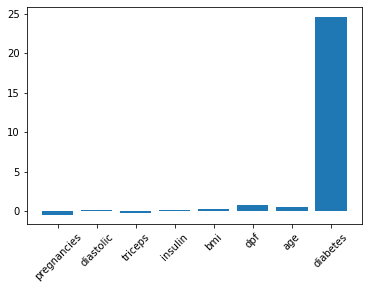

In [40]:
from sklearn.linear_model import Lasso

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

names = diabetes_df.drop("glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

> **We can see that the most important predictor for our target variable, blood glucose levels, is the binary value for whether an individual has diabetes or not.**
### Regularized regression: Ridge


In [41]:
# Create X and y arrays
X = sales_num.drop("sales", axis=1).values
y = sales_num["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.999015210475987, 0.9990152104764387, 0.9990152104809561]


> The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

### Lasso regression for feature importance


[ 3.56256962 -0.00397035  0.00496385]


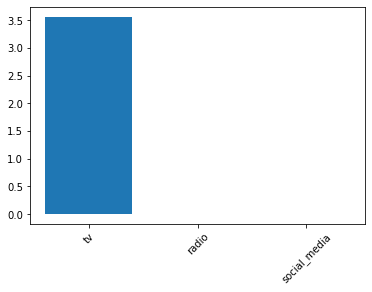

In [43]:
sales_num = sales_df[['tv','radio','social_media','sales']]
sales_columns = sales_num.drop("sales", axis=1).columns

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

> The figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! 
# 3. Fine-Tuning Your Model

## How good is your model?

##### Classification metrics

**Measuring model performance with accuracy:**
* Fraction of correctly classied samples.
* Not always a useful metric.

**Class imbalance**

Classication for predicting fraudulent bank transactions 
    
> 99% of transactions are legitimate; 1% are fraudulent 

Could build a classier that predicts NONE of the transactions are fraudulent 
    
> 99% accurate! 
    
> But terrible at actually predicting fraudulent transactions 
    
> Fails at its original purpose 

Class imbalance: Uneven frequency of classes.

Need a different way to assess performance.


**Precision**

High precision = lower false positive rate 

High precision: Not many legitimate transactions are predicted to be fraudulent.


**Recall = Sensitivity**

High recall = lower false negative rate 

High recall: Predicted most fraudulent transactions correctly.


**F1 Score**

F1 Score: $2* (precision * recall)/(precision + recall)$

In [44]:
X = churn_df[["total_day_charge", "total_eve_charge"]].values

y = churn_df['churn'].values

print(X, y)

[[45.07 16.78]
 [27.47 16.62]
 [41.38 10.3 ]
 ...
 [30.74 24.55]
 [36.35 13.57]
 [39.85 22.6 ]] [0 0 0 ... 0 0 0]


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,                                                     
                                                    random_state=42)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [46]:
print(confusion_matrix(y_test, y_pred))

[[1111   27]
 [ 142   54]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



### Deciding on a primary metric

**Select the problem where it is best suited as the primary metric.**

1. A classifier predicting the positive class of a computer program containing malware. 
> **To avoid installing malware, false negatives should be minimized, hence recall or F1-score are better metrics for this model.**

2. A model predicting the presence of cancer as the positive class.
> **This model should minimize the number of false negatives, so recall is a more appropriate metric.**

3. A model predicting if a customer is a high-value lead for a sales team with limited capacity.

> **With limited capacity, the sales team needs the model to return the highest proportion of true positives compared to all predicted positives, thus minimizing wasted effort.**

### Assessing a diabetes prediction classifier
**The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years).**

In [48]:
X = diabetes_df[['bmi', 'age']].values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [50]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

[[117  34]
 [ 47  33]]


In [51]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.60       231
weighted avg       0.64      0.65      0.64       231



> The model produced 117 true positives, 33 true negatives, 34 false negatives, and 47 false positives. 

> The classification report shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Logistic regression and the ROC curve


#### Logistic regression for binary classification 

Logistic regression is used for classication problems 

Logistic regression out puts probabilities 
> If the probability, $p > 0.5$:
    The data is labeled `1`.

> If the probability, $p < 0.5$:
    The data is labeled `0`.



In [52]:
from sklearn.linear_model import LogisticRegression

X = churn_df[["total_day_charge", "total_eve_charge"]].values

y = churn_df['churn'].values

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,                                                     
                                                    random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

**Predicting probabilities**

In [53]:
y_pred_probs = logreg.predict_proba(X_test)[:,1]
y_pred_probs[:10]

array([0.1882602 , 0.07467647, 0.01957275, 0.17528382, 0.10628287,
       0.07444891, 0.08530954, 0.07142208, 0.15404337, 0.09708168])

#### Probability thresholds 

By default, logistic regression threshold = 0.5 

Not specific to logistic regression 
> KNN classiers also have thresholds 

What happens if we vary the threshold?

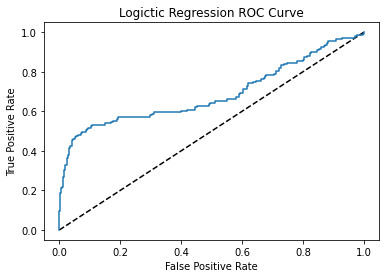

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logictic Regression ROC Curve')
plt.show()

##### ROC AUC
The perfect model: 
> `1` for true positive rate

> `0` for false positive rate

In [55]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.6870364174914934


### Building a logistic regression model


In [56]:
X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df["diabetes"].values
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [57]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)


# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[:10])

[0.26551021 0.18336638 0.1211966  0.15613521 0.4961118  0.4458219
 0.01359249 0.61646093 0.55640529 0.79311776]


> Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79.

### The ROC curve


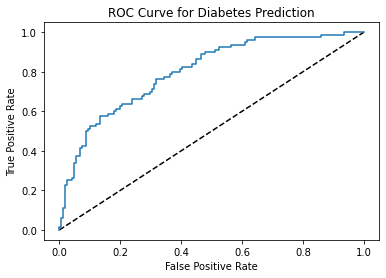

In [58]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

**What does the plot tell you about the model's performance?**
> **The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.**


### ROC AUC


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,                                                     
                                                    random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [60]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8002483443708608
[[121  30]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



> **Logistic regression performs better than the KNN model across all the metrics we calculated**

> A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.

## Hyperparameter tuning

Ridge/lasso regression: Choosing `alpha`

KNN: Choosing `n_neighbors`

Hyperparameters: Parameters we specify before fitting the model 
> Like `alpha` and `n_neighbors`

Choosing the correct hyperparameters 

1. Try lots of different hyperparameter values 

2. Fit all of them separately

3. See how well they perform 

4. Choose the best performing values 

> This is called hyperparameter tuning 

> It is essential to use cross-validation to avoid overfitting to the test set 

> We can still split the data and perform cross-validation on the training set 

> We withhold the test set for final evaluation




In [61]:
X = sales_num.drop("sales", axis=1).values
y = sales_num["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha": np.arange(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}

ridge = Ridge()

ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)

ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.9989768218986852


##### Limitations and an alternative approach

**3-fold cross-validation, 1 hyperparameter, 10 total values = 30fits**

**10-fold cross-validation, 3 hyperparameters, 30 total values = 900fits**


In [63]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'alpha': np.arange(0.0001, 1, 10), "solver": ['sag', 'lsqr']}

ridge = Ridge()

ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)

ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)


{'solver': 'lsqr', 'alpha': 0.0001} 0.9989768218986852


**Evaluating on the test set**


In [64]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)


0.9990157290685653


### Hyperparameter tuning with GridSearchCV


In [65]:
from sklearn.linear_model import Lasso

X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.1)
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [66]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.2978727046846532


> Unfortunately, the best model only has an R-squared score of 0.29, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

### Hyperparameter tuning with RandomizedSearchCV


In [67]:
X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df["diabetes"].values

kf = KFold(n_splits=6, shuffle=True, random_state=42)

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.14294285714285712, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.15510204081632656}
Tuned Logistic Regression Best Accuracy Score: 0.7727840199750312


> Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets.

# 4. Preprocessing and Pipelines

## Preprocessing data

**scikit-learn requirements** 

> Numeric data 

> Missing values 

**With real world data:** 
> This is rarely the case 

> We will often need to preprocess our dataset

**Dealing with categorical features**
> scikit-learn will not accept categorical features by default 

> Need to convert categorical features into numeric values 

> Convert to binary features called dummy variables

  * `0`:Observation was NOT thatcategory

  * `1`:Observation was that category

##### Music dataset

* `popularity`: Target variable

* `genre`: Categorical feature

### Creating dummy variables


In [69]:
music_df = pd.read_csv('music.csv', index_col=0)
music_df.drop('index', axis=1, inplace=True)
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,Jazz
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,Rap
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,Electronic
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,Rock
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,Rap


In [70]:
dummies = pd.get_dummies(music_df['genre'], drop_first=True)
dummies.head()

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0


In [71]:
dummies = pd.concat([music_df, dummies], axis=1)
dummies = dummies.drop('genre', axis=1)
dummies.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,0,0,0,0,0,0,1,0,0
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,0,0,0,0,0,0,0,1,0
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,0,0,0,0,1,0,0,0,0
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,0,0,0,0,0,0,0,0,1
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,0,0,0,0,0,0,0,1,0


In [72]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))
music_dummies.head()

Shape of music_dummies: (1000, 20)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,0,0,0,0,0,0,1,0,0
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,0,0,0,0,0,0,0,1,0
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,0,0,0,0,1,0,0,0,0
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,0,0,0,0,0,0,0,0,1
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,0,0,0,0,0,0,0,1,0


### Regression with categorical features


In [73]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge

# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

kd = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 12.546249461160746
Standard Deviation of the target array: 14.02156909907019


> An average RMSE of approximately 12.54 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

## Handling missing data


**Missing data**
No value for a feature in a particular row 
This can occur because:

> There may have been no observation 

> The data might be corrupt 



**Imputing values**
> Imputation-use subject-matter expertise to replace missing data with educated guesses 

> Common to use the mean 

> Can also use the median, or another value 

> For categorical values, we typically use the most frequent value-the mode 

> Must split our datarst, to avoid data leakage


In [74]:
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
print(music_df.isna().sum().sort_values())


popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [75]:
from sklearn.impute import SimpleImputer

X_cat = music_df["genre"].values.reshape(-1, 1)

X_num = music_df.drop(["genre", "popularity"], axis=1).values

y = music_df["popularity"].values

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2,
                                                            random_state=12)

X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2,
                                                            random_state=12)

imp_cat = SimpleImputer(strategy="most_frequent")

X_train_cat = imp_cat.fit_transform(X_train_cat)

X_test_cat = imp_cat.transform(X_test_cat)


In [76]:
imp_num = SimpleImputer()

X_train_num = imp_num.fit_transform(X_train_num)

X_test_num = imp_num.transform(X_test_num)

X_train = np.append(X_train_num, X_train_cat, axis=1)

X_test = np.append(X_test_num, X_test_cat, axis=1)

In [77]:
from sklearn.pipeline import Pipeline

music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

X = music_df.drop("genre", axis=1).values

y = music_df["genre"].values


In [78]:
steps = [("imputation", SimpleImputer()),
         ("logistic_regression", LogisticRegression())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

0.4633333333333333

### Dropping missing data


In [79]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [80]:
# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 12)


### Pipeline for song genre prediction: I


In [81]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

### Pipeline for song genre prediction: II


In [82]:
steps = [("imputer", SimpleImputer()),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[71 69]
 [75 85]]


> See how easy it is to scale our model building workflow using pipelines. In this case, the confusion matrix highlights that the model had 71 true positives and 85 true negatives!

## Centering and scaling


In [83]:
print(music_df[["duration_ms", "loudness", "speechiness"]].describe())

        duration_ms     loudness  speechiness
count  1.000000e+03  1000.000000  1000.000000
mean   2.172204e+05    -8.253305     0.077879
std    1.175582e+05     5.158523     0.089451
min   -1.000000e+00   -38.718000     0.023400
25%    1.806562e+05    -9.775500     0.033100
50%    2.163000e+05    -6.855000     0.043600
75%    2.605025e+05    -4.977750     0.074950
max    1.617333e+06    -0.883000     0.710000


**How to scale our data**

Subtract the mean and divide by variance

> All features are centered around zero and have a variance of one

> This is called standardization 

Can also subtract the minimum and divide by the range 

> Minimum zero and maximum one 

Can also normalize so the data ranges from -1 to +1

In [85]:
from sklearn.preprocessing import StandardScaler

X = music_df.drop("genre", axis=1).values

y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

19762.413275219726 71791.8429618064
4.037174635000569e-16 0.9999999999999993


##### Scaling in a pipeline

In [86]:
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = knn_scaled.predict(X_test)

print(knn_scaled.score(X_test, y_test))

1.0


##### Comparing performance using unscaled data

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

1.0


##### CV and scaling in a pipeline

In [89]:
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [90]:
print(cv.best_score_)

1.0


In [91]:
print(cv.best_params_)

{'knn__n_neighbors': 1}


### Centering and scaling for regression


In [93]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

1.0


### Centering and scaling for classification


In [96]:
# # Build the steps
# steps = [("scaler", StandardScaler()),
#          ("logreg", LogisticRegression())]
# pipeline = Pipeline(steps)

# # Create the parameter space
# parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
#                                                     random_state=21)

# # Instantiate the grid search object
# cv = GridSearchCV(pipeline, param_grid=parameters)

# # Fit to the training data
# cv.fit(X_train, y_train)
# print(cv.best_score_, "\n", cv.best_params_)

## Evaluating multiple models


#### Different models for different problems 

**Some guiding principles** 

Size of the dataset 
> Fewer features = simpler model, faster training time 

> Some models require large amounts of data to perform well 

Interpretability

> Some models are easier to explain, which can be important for stakeholders 

> Linear regression has high interpretability, as we can understand the coecients 

Flexibility

> May improve accuracy, by making fewer assumptions about data 


> KNN is a more flexible model, doesn't assume any linear relationships


**It's all in the metrics**

Regression model performance:

> RMSE

> R-squared

Classication model performance:

> Accuracy

> Confusion matrix 

> Precision, recall, F1-score

> ROCAUC

Train several models and evaluate performance out of the box


**A note on scaling**

Models affected by scaling:

> KNN

> Linear Regression(plusRidge,Lasso)

> Logistic Regression

> Articial Neural Network

Best to scale our data before evaluating models


### Evaluating classification models

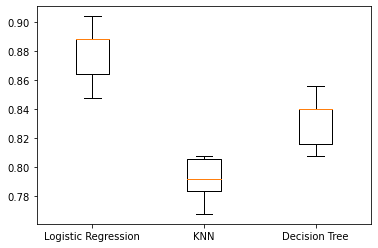

In [99]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

music = pd.read_csv('music_clean.csv', index_col=0)
X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

results = []

for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [100]:
for name, model in models.items():  
    model.fit(X_train_scaled, y_train)  
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.82
KNN Test Set Accuracy: 0.784
Decision Tree Test Set Accuracy: 0.78


### Visualizing regression model performance


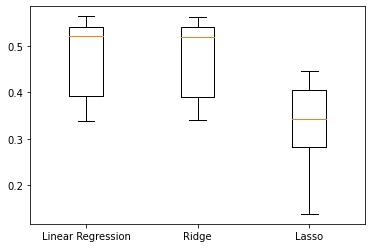

In [101]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

> Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.
### Predicting on the test set


In [103]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.40873615980882466
Ridge Test Set RMSE: 0.40797576259479407
Lasso Test Set RMSE: 0.41954209187910224


### Visualizing classification model performance


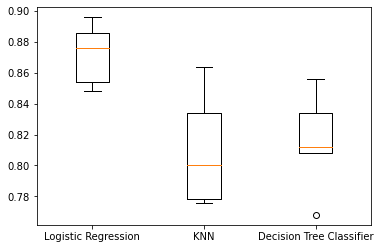

In [104]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

### Pipeline for predicting song popularity


In [105]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 1.0, 'logreg__solver': 'newton-cg'}, Accuracy: 0.82


> Excellent - we've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is 82% accurate in predicting song genres!